# Multiclass classification - Food101 Dataset

steps we are going to perform on this dataset:
1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust differnt parameters and improve model (try to beat your baseline)
7. Repeat unitl satisfied.
8. Save the model
9. Load the model

### 1. Import and become one with the data

In [6]:
import zipfile

!wget !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()


--2026-02-14 17:09:46--  http://!wget/
Resolving !wget (!wget)... failed: Name or service not known.
wget: unable to resolve host address ‘!wget’
--2026-02-14 17:09:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.207, 142.250.99.207, 142.250.107.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  52.8MB/s    in 7.2s    

2026-02-14 17:09:53 (69.1 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]

FINISHED --2026-02-14 17:09:53--
Total wall clock time: 7.3s
Downloaded: 1 files, 495M in 7.2s (69.1 MB/s)


In [7]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.

In [8]:
# set the train and test directory
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img


In [ ]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

In [ ]:
### 2. Preprocess the data (prepare it for a model)
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data from the directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')






### 3. Create a model (start with a baseline)

We can use the same model (TinyVGG) we used for the binary classification problem for our multi-class classification problem with a couple of small tweaks.

Namely:
* Changing the output layer to use have 10 ouput neurons (the same number as the number of classes we have).
* Changing the output layer to use `'softmax'` activation instead of `'sigmoid'` activation.
* Changing the loss function to be `'categorical_crossentropy'` instead of `'binary_crossentropy'`.

In [ ]:
# importing libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation

# Create a model (based on TinyVGG architecture)
model_1 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# compile the model
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


### 4. Fit the model

In [ ]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 35s 123ms/step - accuracy: 0.1383 - loss: 2.2836 - val_accuracy: 0.2372 - val_loss: 2.0933
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - accuracy: 0.3303 - loss: 1.9219 - val_accuracy: 0.3368 - val_loss: 1.8695
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 109ms/step - accuracy: 0.4839 - loss: 1.5606 - val_accuracy: 0.3300 - val_loss: 2.0278
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 103ms/step - accuracy: 0.6852 - loss: 0.9745 - val_accuracy: 0.3164 - val_loss: 2.3373
Epoch 5/5
  1/235 ━━━━━━━━━━━━━━━━━━━━ 31s 134ms/step - accuracy: 0.9688 - loss: 0.3504

### 5. Evaluate the model

In [ ]:
# evaluate the model on test data
model_1.evaluate(test_data)

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
# Check out the model's loss curves on the 10 classes of the data
plot_loss_curves(history_1)

It seems like our model is overfitting the training set quite badly.

There are wasy to prevent model overfitting:
1. **Get more data** - having more data gives the model more opportunities to learn patterns.
2. **Simplify model** - If the current model is already overfitting the training data, it may be too complicated of a model. one way to simplify is to reduce the number of layers it uses or to reduce the no of filters from each layers.
3. **Use data augmentation** - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
4. **Use transfer learning** - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task.


#### Try a simplified model (to reduce overfitting)


In [18]:
# create a simpified model
model_2 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# compile the model
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 108ms/step - accuracy: 0.1740 - loss: 2.4863 - val_accuracy: 0.3128 - val_loss: 1.9608
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 98ms/step - accuracy: 0.3753 - loss: 1.8242 - val_accuracy: 0.3232 - val_loss: 1.9148
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 98ms/step - accuracy: 0.5051 - loss: 1.5112 - val_accuracy: 0.2996 - val_loss: 2.0331
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.6887 - loss: 1.0152 - val_accuracy: 0.3008 - val_loss: 2.2678
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 99ms/step - accuracy: 0.8350 - loss: 0.5891 - val_accuracy: 0.2796 - val_loss: 2.5413


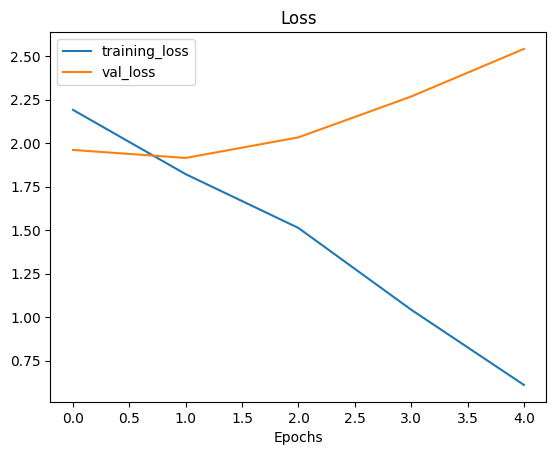

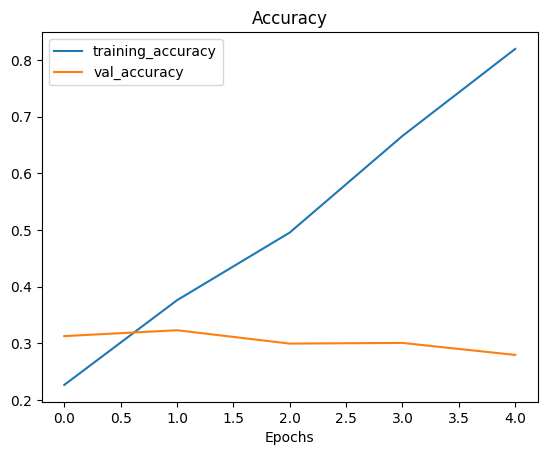

In [19]:
# Check out the loss curves of model_2
plot_loss_curves(history_2)

#### Try Data augmentation (to reduce overfitting)


In [20]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [21]:
# let's clone the model (use the same architecture)
model_3 = tf.keras.models.clone_model(model_2)

# compile the cloned model
model_3.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
history_3 = model_3.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 99s 414ms/step - accuracy: 0.1840 - loss: 2.2300 - val_accuracy: 0.2684 - val_loss: 2.0280
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 95s 406ms/step - accuracy: 0.2808 - loss: 2.0412 - val_accuracy: 0.3236 - val_loss: 1.9081
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 95s 406ms/step - accuracy: 0.2913 - loss: 2.0129 - val_accuracy: 0.3112 - val_loss: 2.0204
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 95s 403ms/step - accuracy: 0.3126 - loss: 1.9812 - val_accuracy: 0.3560 - val_loss: 1.8254
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 95s 405ms/step - accuracy: 0.3312 - loss: 1.9350 - val_accuracy: 0.3872 - val_loss: 1.7962


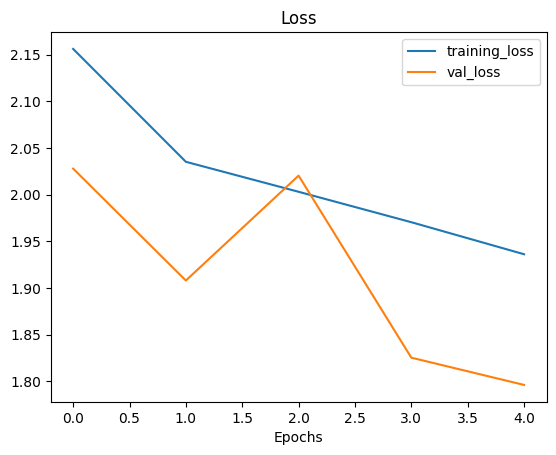

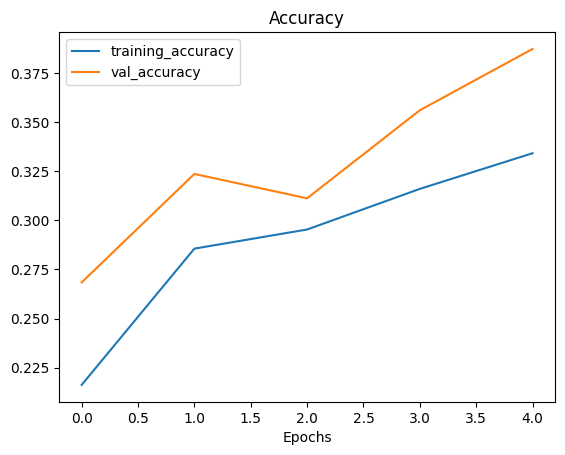

In [41]:
# Check out our model's performance with augmented data
plot_loss_curves(history_3)

### Making a prediction with our trained model


In [42]:
# What classes has our model been trained on?
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [43]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


In [27]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


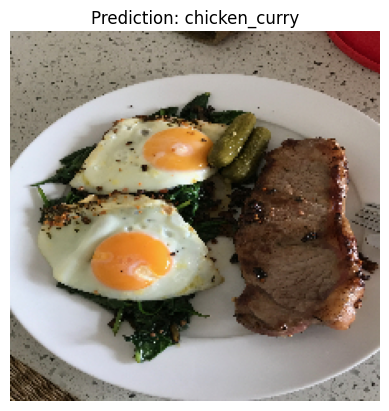

In [44]:
# Make a prediction using model_3
pred_and_plot(model=model_3,
              filename="03-steak.jpeg",
              class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


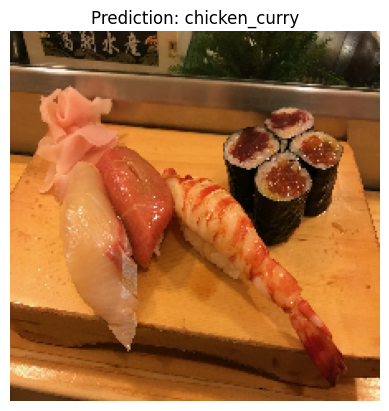

In [45]:
pred_and_plot(model_3, "03-sushi.jpeg", class_names)

In [46]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


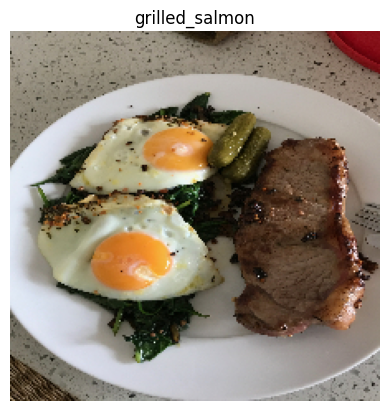

In [47]:
# Load in and preprocess our custom image
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model_3.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);


In [48]:
# Check the output of the predict function
pred = model_3.predict(tf.expand_dims(img, axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[0.04446172, 0.02352676, 0.03432661, 0.41386318, 0.10255492,
        0.06277316, 0.00570697, 0.12074801, 0.11940142, 0.0726372 ]],
      dtype=float32)

In [49]:
# Find the predicted class name
class_names[pred.argmax()]

np.str_('grilled_salmon')

In [50]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


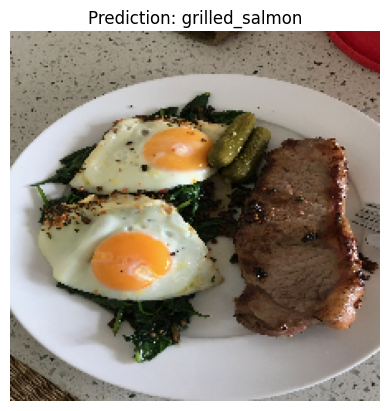

In [51]:
pred_and_plot(model_3, "03-steak.jpeg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


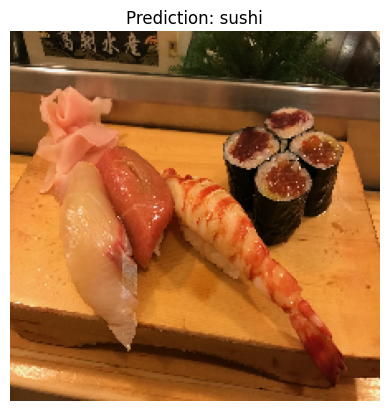

In [52]:
pred_and_plot(model_3, "03-sushi.jpeg", class_names)

### Saving and loading our model

In [53]:
# Save a model
model_3.save('multiclass_image_classification_model.keras')

In [54]:
# Load in a model and evaluate it
model = tf.keras.models.load_model('multiclass_image_classification_model.keras')
model.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.3882 - loss: 1.8016


[1.7962392568588257, 0.3871999979019165]